## **UI Diagram to .gui Code Generation Via CNN-LSTM Based Image Captioning (Dataset 3)**

**First we load the data from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

print(os.listdir('/content/drive/My Drive/PRCD/D1'))

['.DS_Store', 'IMAGES', 'TEXT_LABELS']


In [3]:
d1ImageFolder = '/content/drive/My Drive/PRCD/D1/IMAGES/'
d1LabelFolder = '/content/drive/My Drive/PRCD/D1/TEXT_LABELS/'

d2ImageFolder = '/content/drive/My Drive/PRCD/D2/IMAGES/'
d2LabelFolder = '/content/drive/My Drive/PRCD/D2/TEXT_LABELS/'

d3ImageFolder = '/content/drive/My Drive/PRCD/D3/IMAGES/'
d3LabelFolder = '/content/drive/My Drive/PRCD/D3/TEXT_LABELS/'

d1ImageFiles = [d1ImageFolder+item for item in os.listdir(d1ImageFolder) if '.DS_Store' not in item]
d1LabelFiles = [d1LabelFolder+item for item in os.listdir(d1LabelFolder) if '.DS_Store' not in item]

d2ImageFiles = [d2ImageFolder+item for item in os.listdir(d2ImageFolder) if '.DS_Store' not in item]
d2LabelFiles = [d2LabelFolder+item for item in os.listdir(d2LabelFolder) if '.DS_Store' not in item]

d3ImageFiles = [d3ImageFolder+item for item in os.listdir(d3ImageFolder) if '.DS_Store' not in item]
d3LabelFiles = [d3LabelFolder+item for item in os.listdir(d3LabelFolder) if '.DS_Store' not in item]

print(len(d1ImageFiles))
print(len(d1LabelFiles))
print(len(d2ImageFiles))
print(len(d2LabelFiles))
print(len(d3ImageFiles))
print(len(d3LabelFiles))

300
300
300
300
300
300


In [4]:
sortedD1ImgFiles = sorted(d1ImageFiles)
sortedD1LblFiles = sorted(d1LabelFiles)

print(sortedD1ImgFiles[:5])
print(sortedD1LblFiles[:5])

['/content/drive/My Drive/PRCD/D1/IMAGES/01357379-D6C2-4B01-AA66-C8790642D0B1.png', '/content/drive/My Drive/PRCD/D1/IMAGES/01B6145F-B88B-4FF8-B7D7-BB8A321EDA85.png', '/content/drive/My Drive/PRCD/D1/IMAGES/02C4C780-79EA-43F1-B2AE-3A2C757F874C.png', '/content/drive/My Drive/PRCD/D1/IMAGES/03806667-47A8-4965-8E93-21E205D5E8A7.png', '/content/drive/My Drive/PRCD/D1/IMAGES/042B145D-1E0D-47CB-B16C-7F49B64DFF53.png']
['/content/drive/My Drive/PRCD/D1/TEXT_LABELS/01357379-D6C2-4B01-AA66-C8790642D0B1.gui', '/content/drive/My Drive/PRCD/D1/TEXT_LABELS/01B6145F-B88B-4FF8-B7D7-BB8A321EDA85.gui', '/content/drive/My Drive/PRCD/D1/TEXT_LABELS/02C4C780-79EA-43F1-B2AE-3A2C757F874C.gui', '/content/drive/My Drive/PRCD/D1/TEXT_LABELS/03806667-47A8-4965-8E93-21E205D5E8A7.gui', '/content/drive/My Drive/PRCD/D1/TEXT_LABELS/042B145D-1E0D-47CB-B16C-7F49B64DFF53.gui']


In [5]:
sortedD2ImgFiles = sorted(d2ImageFiles)
sortedD2LblFiles = sorted(d2LabelFiles)

print(sortedD2ImgFiles[:5])
print(sortedD2LblFiles[:5])

['/content/drive/My Drive/PRCD/D2/IMAGES/10408432.png', '/content/drive/My Drive/PRCD/D2/IMAGES/10410760.png', '/content/drive/My Drive/PRCD/D2/IMAGES/10520680.png', '/content/drive/My Drive/PRCD/D2/IMAGES/10616008.png', '/content/drive/My Drive/PRCD/D2/IMAGES/10810885.png']
['/content/drive/My Drive/PRCD/D2/TEXT_LABELS/10408432.gui', '/content/drive/My Drive/PRCD/D2/TEXT_LABELS/10410760.gui', '/content/drive/My Drive/PRCD/D2/TEXT_LABELS/10520680.gui', '/content/drive/My Drive/PRCD/D2/TEXT_LABELS/10616008.gui', '/content/drive/My Drive/PRCD/D2/TEXT_LABELS/10810885.gui']


In [6]:
sortedD3ImgFiles = sorted(d3ImageFiles)
sortedD3LblFiles = sorted(d3LabelFiles)

print(sortedD3ImgFiles[:5])
print(sortedD3LblFiles[:5])

['/content/drive/My Drive/PRCD/D3/IMAGES/1007382.png', '/content/drive/My Drive/PRCD/D3/IMAGES/1017406.png', '/content/drive/My Drive/PRCD/D3/IMAGES/1022926.png', '/content/drive/My Drive/PRCD/D3/IMAGES/102606.png', '/content/drive/My Drive/PRCD/D3/IMAGES/1030494.png']
['/content/drive/My Drive/PRCD/D3/TEXT_LABELS/1007382.gui', '/content/drive/My Drive/PRCD/D3/TEXT_LABELS/1017406.gui', '/content/drive/My Drive/PRCD/D3/TEXT_LABELS/1022926.gui', '/content/drive/My Drive/PRCD/D3/TEXT_LABELS/102606.gui', '/content/drive/My Drive/PRCD/D3/TEXT_LABELS/1030494.gui']


In [7]:
with open('/content/drive/My Drive/PRCD/D3/TEXT_LABELS/1007382.gui', "r") as f:
    lines = f.readlines()
print(' \n'.join(lines))

components {
 
sidebar, home
 
}
 
orientation {
 
sidebar-left-home-right
 
}
 
sidebar {
 
user {
 
user-img
 
}
 
nav {
 
field-inactive, field-inactive, field-active
 
}
 
logo {
 
logo-img
 
}
 
}
 
home {
 
cards {
 
img-card, img-txt-btn-card, img-card
 
}
 
table {
 
btns {
 
btn
 
}
 
table-col {
 
category, category
 
}
 
table-row {
 
entry
 
}
 
}
 
}



**We observe that there are 300 samples in total for each of the datasets. Also the UI images and there corresponding code files only differ in there file extensions. This will be useful while writing our dataloader.**

In [65]:
# CREATE DATALOADER

import pandas as pd
import spacy
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image

class Vocabulary:
  def __init__(self, freq_thresh):
    self.itos = {0:"<PAD>", 1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}
    self.stoi = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}
    self.freq_thresh = freq_thresh

  def __len__(self):
    return len(self.itos)

  @staticmethod
  def my_tokenizer(text):
    return text.split(' ')

  def build_vocab(self,caption_list):
    frequencies = {}
    idx = 4
    text_captions = []
    for file in caption_list:
      with open(file, "r") as f:
        lines = f.readlines()
      caption = ' \n'.join(lines)
      for word in caption.split(' '):
        if word not in frequencies:
          frequencies[word] = 1
        else:
          frequencies[word] += 1

        if frequencies[word] == self.freq_thresh:
          self.stoi[word] = idx
          self.itos[idx] = word
          idx += 1
  def num(self, text):
    tokenized_text = text.split(' ')

    return [
        self.stoi[token] if token in self.stoi else self.stoi['<UNK>']
        for token in tokenized_text
    ]  

class MyDataset(Dataset):
  def __init__(self, imgPathList, transform = None, freq_thresh=3):
    self.imgPathList = imgPathList
    self.transform = transform

    # Initialize vocabulary and build vocabulary
    self.caption_list = [item.replace('.png','.gui').replace('/IMAGES/','/TEXT_LABELS/') for item in self.imgPathList]
    self.vocab = Vocabulary(freq_thresh)
    self.vocab.build_vocab(self.caption_list)

  def __len__(self):
    return len(self.imgPathList)

  def __getitem__(self, index):
    captionPath = self.caption_list[index]

    with open(captionPath, "r") as f:
      lines = f.readlines()
    caption = ' \n'.join(lines)

    imgPath = self.imgPathList[index]
    img = Image.open(imgPath).convert("RGB")

    if self.transform is not None:
      img = self.transform(img)

    num_caption = [self.vocab.stoi["<SOS>"]]
    num_caption += self.vocab.num(caption)
    num_caption.append(self.vocab.stoi["<EOS>"])

    return img, torch.tensor(num_caption)

class MyCollate:
  def __init__(self, pad_idx):
    self.pad_idx = pad_idx

  def __call__(self, batch):
    imgs = [item[0].unsqueeze(0) for item in batch]
    imgs = torch.cat(imgs, dim=0)
    targets = [item[1] for item in batch]
    targets = pad_sequence(targets, batch_first=False, padding_value=self.pad_idx)

    return imgs, targets

def get_loader(imgPathList, 
               transform, 
               batch_size=16, 
               num_workers=8,
               shuffle = True,
               pin_memory = True,
               ):
  dataset = MyDataset(imgPathList, transform)
  pad_idx = dataset.vocab.stoi["<PAD>"]

  # print(dataset[0][0].shape)
  # print(dataset[0][1].shape)
  # print(dataset[1][0].shape)
  # print(dataset[1][1].shape)

  loader = DataLoader(
      dataset = dataset,
      batch_size = batch_size,
      num_workers = num_workers,
      shuffle = shuffle,
      pin_memory = pin_memory,
      collate_fn = MyCollate(pad_idx=pad_idx)
  )

  return loader

transform = transforms.Compose([transforms.Resize((320,320)),transforms.ToTensor()])

dataloader = get_loader(sortedD3ImgFiles, transform)

for idx, data  in enumerate(dataloader):
  print(data[0].shape)
  print(data[1].shape)
  


torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([60, 16])
torch.Size([16, 3, 320, 320])
torch.Size([60, 16])
torch.Size([16, 3, 320, 320])
torch.Size([57, 16])
torch.Size([16, 3, 320, 320])
torch.Size([59, 16])
torch.Size([16, 3, 320, 320])
torch.Size([59, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([57, 16])
torch.Size([16, 3, 320, 320])
torch.Size([60, 16])
torch.Size([16, 3, 320, 320])
torch.Size([57, 16])
torch.Size([16, 3, 320, 320])
torch.Size([59, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([59, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([16, 3, 320, 320])
torch.Size([58, 16])
torch.Size([12, 3, 320, 320])
torch.Size([58, 12])


**We observe that our dataloader has been able to successfully generate batches of equal length text labels and the image transforms are also working**

In [66]:
# CREATE MODEL

import torch.nn as nn
import statistics
import torchvision.models as models


class EncoderCNN(nn.Module):
    def __init__(self, embed_size, train_CNN=False):
        super(EncoderCNN, self).__init__()
        self.train_CNN = train_CNN
        self.res = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        self.res.fc = nn.Linear(self.res.fc.in_features, embed_size)
        self.relu = nn.ReLU()
        self.times = []
        self.dropout = nn.Dropout(0.5)

    def forward(self, images):
        features = self.res(images)
        return self.dropout(self.relu(features))


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, features, captions):
        embeddings = self.dropout(self.embed(captions))
        embeddings = torch.cat((features.unsqueeze(0), embeddings), dim=0)
        hiddens, _ = self.lstm(embeddings)
        outputs = self.linear(hiddens)
        return outputs


class CNNtoRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(CNNtoRNN, self).__init__()
        self.encoderCNN = EncoderCNN(embed_size)
        self.decoderRNN = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers)

    def forward(self, images, captions):
        features = self.encoderCNN(images)
        outputs = self.decoderRNN(features, captions)
        return outputs

    def caption_image(self, image, vocabulary, max_length=50):
        result_caption = []

        with torch.no_grad():
            x = self.encoderCNN(image).unsqueeze(0)
            states = None

            for _ in range(max_length):
                hiddens, states = self.decoderRNN.lstm(x, states)
                output = self.decoderRNN.linear(hiddens.squeeze(0))
                predicted = output.argmax(1)
                result_caption.append(predicted.item())
                x = self.decoderRNN.embed(predicted).unsqueeze(0)

                if vocabulary.itos[predicted.item()] == "<EOS>":
                    break

        return [vocabulary.itos[idx] for idx in result_caption]


**In the above code we have created our CNN-LSTM model. It is a simple model with ResNet50 architecture frozen while keeping only the fc layers trainable. The ResNet50 features are passed on to the subsequent LSTM based decoder. Finally both the encoder and the decoder are combined. We also keep one caption_image method that can be used for inference.**

In [67]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(sortedD3ImgFiles, sortedD3LblFiles, test_size=0.1, random_state=42)
print(len(xTrain))
print(len(yTrain))
print(len(xTest))
print(len(yTest))

270
270
30
30


In [68]:
# TRAIN LOOP

import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

def train():
    transform = transforms.Compose(
        [
            transforms.Resize((356, 356)),
            transforms.RandomCrop((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

    dataset = MyDataset(xTrain, transform)

    train_loader = get_loader(
        xTrain, 
        transform,
    )

    torch.backends.cudnn.benchmark = True
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    load_model = False
    save_model = False
    train_CNN = False

    # Hyperparameters
    embed_size = 256
    hidden_size = 256
    vocab_size = len(dataset.vocab)
    num_layers = 1
    learning_rate = 3e-4
    num_epochs = 100

    # for tensorboard
    writer = SummaryWriter("runs/TRCD_D3")
    step = 0

    # initialize model, loss etc
    model = CNNtoRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Only finetune the CNN
    for name, param in model.encoderCNN.res.named_parameters():
        if "fc.weight" in name or "fc.bias" in name:
            param.requires_grad = True
        else:
            param.requires_grad = train_CNN

    # if load_model:
    #     step = load_checkpoint(torch.load("my_checkpoint.pth.tar"), model, optimizer)

    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0
        num_batches = 0
        # Uncomment the line below to see a couple of test cases
        # print_examples(model, device, dataset)

        # if save_model:
        #     checkpoint = {
        #         "state_dict": model.state_dict(),
        #         "optimizer": optimizer.state_dict(),
        #         "step": step,
        #     }
        #     save_checkpoint(checkpoint)

        for idx, (imgs, captions) in tqdm(
            enumerate(train_loader), total=len(train_loader), leave=False
        ):
            imgs = imgs.to(device)
            captions = captions.to(device)

            # print(imgs.shape)
            # print(captions.shape)

            outputs = model(imgs, captions[:-1])
            loss = criterion(
                outputs.reshape(-1, outputs.shape[2]), captions.reshape(-1)
            )

            writer.add_scalar("Training loss", loss.item(), global_step=step)
            
            epoch_loss += loss.item()

            num_batches += 1

            step += 1

            optimizer.zero_grad()
            loss.backward(loss)
            optimizer.step()

        print(f"Epoch {epoch+1} Loss is: {epoch_loss/num_batches}")
        
    return model

model = train()

Epoch 1 Loss is: 3.817195738063139


Epoch 2 Loss is: 2.9918663922478173


Epoch 3 Loss is: 2.3757376811083626


Epoch 4 Loss is: 1.9498255112591911


Epoch 5 Loss is: 1.612894808544832


Epoch 6 Loss is: 1.3468826307969934


Epoch 7 Loss is: 1.1429153470432056


Epoch 8 Loss is: 0.992859002421884


Epoch 9 Loss is: 0.8808951202560874


Epoch 10 Loss is: 0.7987894135362962


Epoch 11 Loss is: 0.7341473312938914


Epoch 12 Loss is: 0.6840691461282618


Epoch 13 Loss is: 0.6404582156854517


Epoch 14 Loss is: 0.6084088998682359


Epoch 15 Loss is: 0.5780895773102256


Epoch 16 Loss is: 0.5546890917946311


Epoch 17 Loss is: 0.5344107221154606


Epoch 18 Loss is: 0.5182940679437974


Epoch 19 Loss is: 0.5005180379923653


Epoch 20 Loss is: 0.4864465208614574


Epoch 21 Loss is: 0.47536062843659344


Epoch 22 Loss is: 0.4634388895595775


Epoch 23 Loss is: 0.45462406382841225


Epoch 24 Loss is: 0.4453110309208141


Epoch 25 Loss is: 0.43847036712309895


Epoch 26 Loss is: 0.42956163602716785


Epoch 27 Loss is: 0.4232468780349283


Epoch 28 Loss is: 0.4167182726018569


Epoch 29 Loss is: 0.4116254396298352


Epoch 30 Loss is: 0.40611022009569053


Epoch 31 Loss is: 0.40132587271578174


Epoch 32 Loss is: 0.3960409269613378


Epoch 33 Loss is: 0.39173706489450794


Epoch 34 Loss is: 0.3869670769747566


Epoch 35 Loss is: 0.38364063641604257


Epoch 36 Loss is: 0.3793800157659194


Epoch 37 Loss is: 0.37572066748843475


Epoch 38 Loss is: 0.3718850612640381


Epoch 39 Loss is: 0.36916106062776904


Epoch 40 Loss is: 0.3655582263189204


Epoch 41 Loss is: 0.36333142834551196


Epoch 42 Loss is: 0.35948287388857675


Epoch 43 Loss is: 0.3566244174452389


Epoch 44 Loss is: 0.3538873984533198


Epoch 45 Loss is: 0.35138215387568755


Epoch 46 Loss is: 0.3490166734246647


Epoch 47 Loss is: 0.3469262105577132


Epoch 48 Loss is: 0.34480905006913576


Epoch 49 Loss is: 0.3420240598566392


Epoch 50 Loss is: 0.3398334068410537


Epoch 51 Loss is: 0.3386659709846272


Epoch 52 Loss is: 0.3366200205157785


Epoch 53 Loss is: 0.33615364397273345


Epoch 54 Loss is: 0.3328387754804948


Epoch 55 Loss is: 0.33183900047751036


Epoch 56 Loss is: 0.32962049631511464


Epoch 57 Loss is: 0.3290381536764257


Epoch 58 Loss is: 0.32645546688753013


Epoch 59 Loss is: 0.32601641732103687


Epoch 60 Loss is: 0.3244452196009019


Epoch 61 Loss is: 0.32279696534661684


Epoch 62 Loss is: 0.3224359575439902


Epoch 63 Loss is: 0.31842315722914305


Epoch 64 Loss is: 0.31821175883798036


Epoch 65 Loss is: 0.3184122232829823


Epoch 66 Loss is: 0.31654824579463287


Epoch 67 Loss is: 0.31498448112431693


Epoch 68 Loss is: 0.31300220769994397


Epoch 69 Loss is: 0.31294068343499126


Epoch 70 Loss is: 0.312458616845748


Epoch 71 Loss is: 0.31206562764504375


Epoch 72 Loss is: 0.3112155479543349


Epoch 73 Loss is: 0.30827399562386903


Epoch 74 Loss is: 0.30879802212995644


Epoch 75 Loss is: 0.3074953959268682


Epoch 76 Loss is: 0.3057214232052074


Epoch 77 Loss is: 0.3047712743282318


Epoch 78 Loss is: 0.30458561988437877


Epoch 79 Loss is: 0.3033191105898689


Epoch 80 Loss is: 0.3025575595743516


Epoch 81 Loss is: 0.3022858623196097


Epoch 82 Loss is: 0.3003493284477907


Epoch 83 Loss is: 0.3007413236533894


Epoch 84 Loss is: 0.2992639471502865


Epoch 85 Loss is: 0.2992258825722863


Epoch 86 Loss is: 0.2975228972294751


Epoch 87 Loss is: 0.29669930303798003


Epoch 88 Loss is: 0.29697758835904736


Epoch 89 Loss is: 0.2966020703315735


Epoch 90 Loss is: 0.2968639661284054


Epoch 91 Loss is: 0.2951470876441282


Epoch 92 Loss is: 0.29484424520941344


Epoch 93 Loss is: 0.2950122742091908


Epoch 94 Loss is: 0.29424414915197034


Epoch 95 Loss is: 0.2943922368919148


Epoch 96 Loss is: 0.2925956985529731


Epoch 97 Loss is: 0.29290728533969207


Epoch 98 Loss is: 0.29150617823881264


Epoch 99 Loss is: 0.29077283950412974


Epoch 100 Loss is: 0.2894728884977453


**Above we write the model training code. 100 epochs are considered in this particular work.**

In [69]:
# SAVE MODEL
model_save_name = 'PRCD_D3_RS42_100Epoch_NoVal_Model_1.pt'

torch.save(model.state_dict(), model_save_name)

In [70]:
# LOAD MODEL

load_path = "PRCD_D3_RS42_100Epoch_NoVal_Model_1.pt" 
model.load_state_dict(torch.load(load_path))

<All keys matched successfully>

**Once the trained model is available, we can perform inference and check our results.**

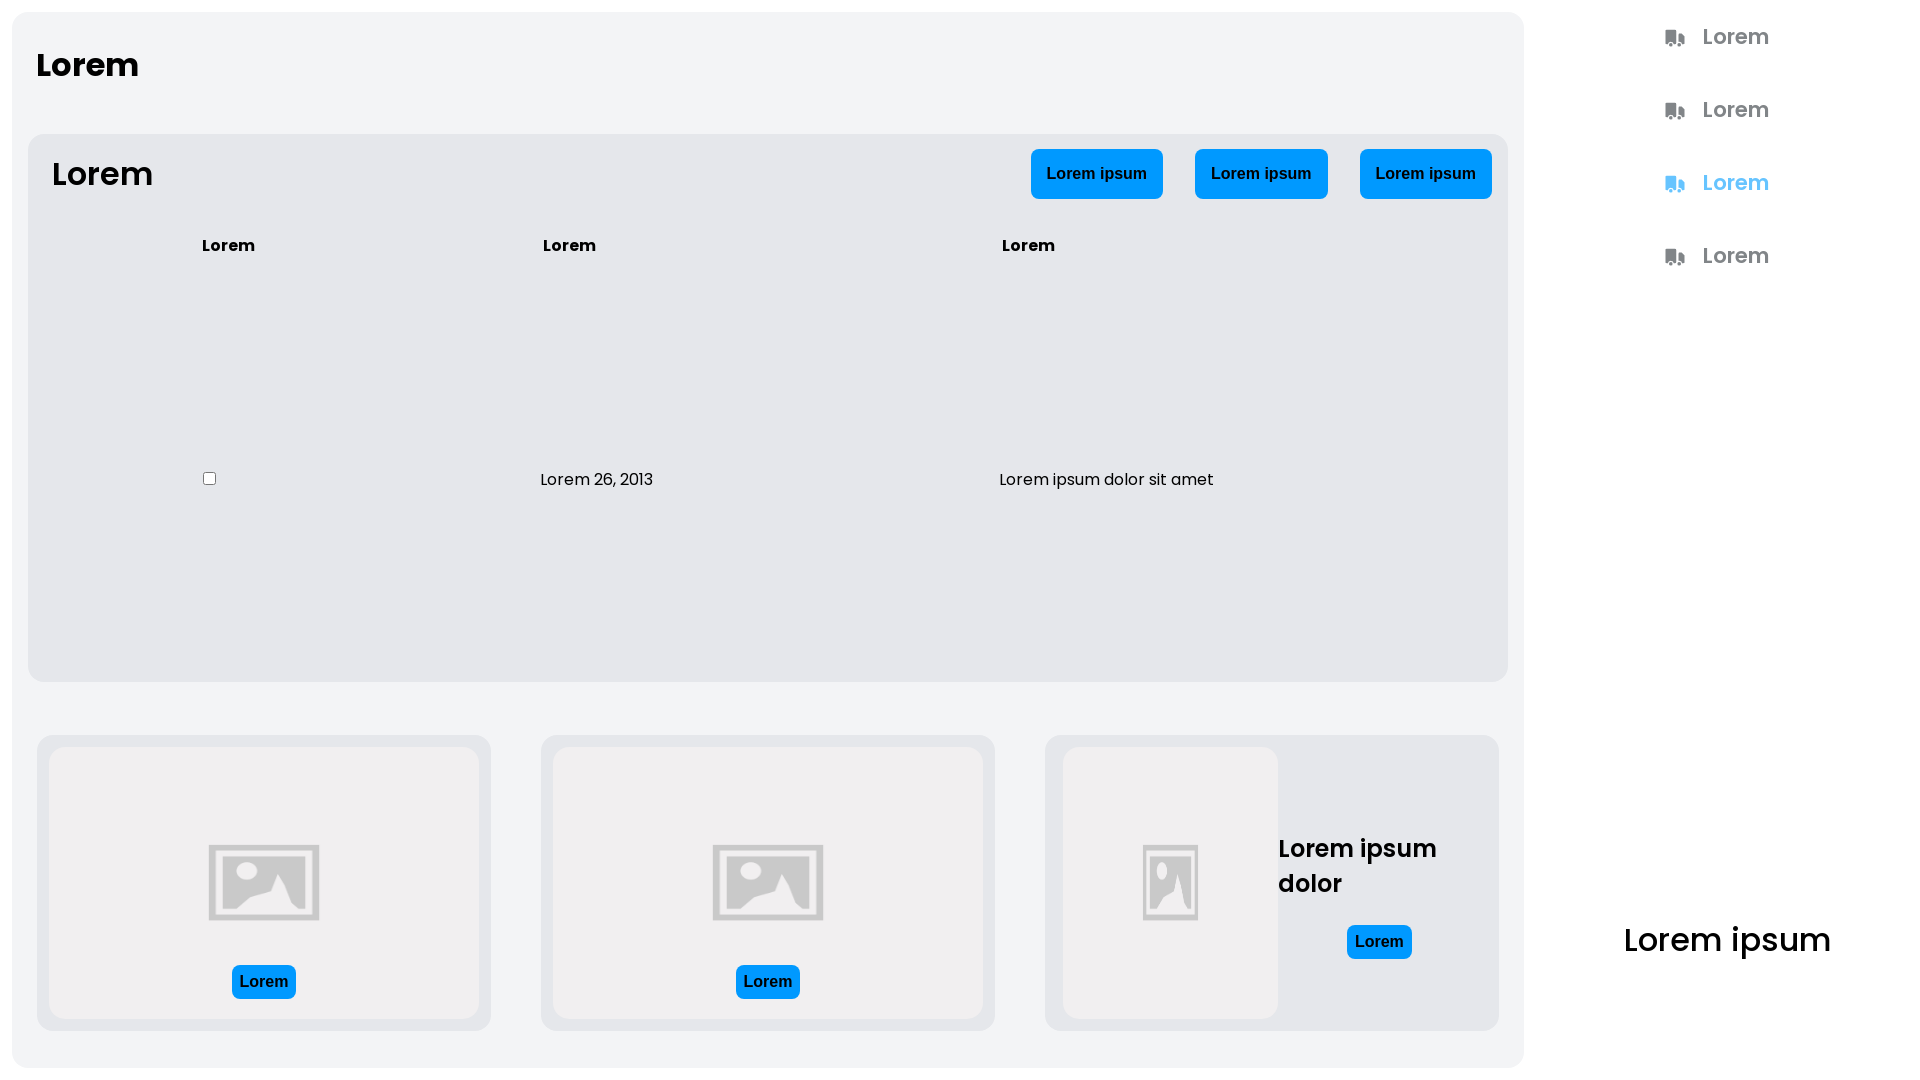

Correct Caption: 

components {
 
home, sidebar
 
}
 
orientation {
 
sidebar-right-home-left
 
}
 
home {
 
table {
 
btns {
 
btn, btn, btn
 
}
 
table-col {
 
category, category, category
 
}
 
table-row {
 
entry
 
}
 
}
 
cards {
 
img-btn-card, img-btn-card, img-txt-btn-card
 
}
 
}
 
sidebar {
 
nav {
 
field-inactive, field-inactive, field-active, field-inactive
 
}
 
user {
 
user-name
 
}
 
}

Predicted Caption: 

<SOS> components {
 
home, sidebar
 
}
 
orientation {
 
sidebar-right-home-left
 
}
 
home {
 
cards {
 
img-card, img-card, img-card
 
}
 
table {
 
btns {
 
btn, btn
 
}
 
table-col {
 
category, category, category
 
}
 
table-row {
 
entry, entry, entry, entry
 
}
 
}
 
}
 
sidebar {
 
user {
 
user-img-user-name
 
}
 
logo {
 
logo-img
 
}



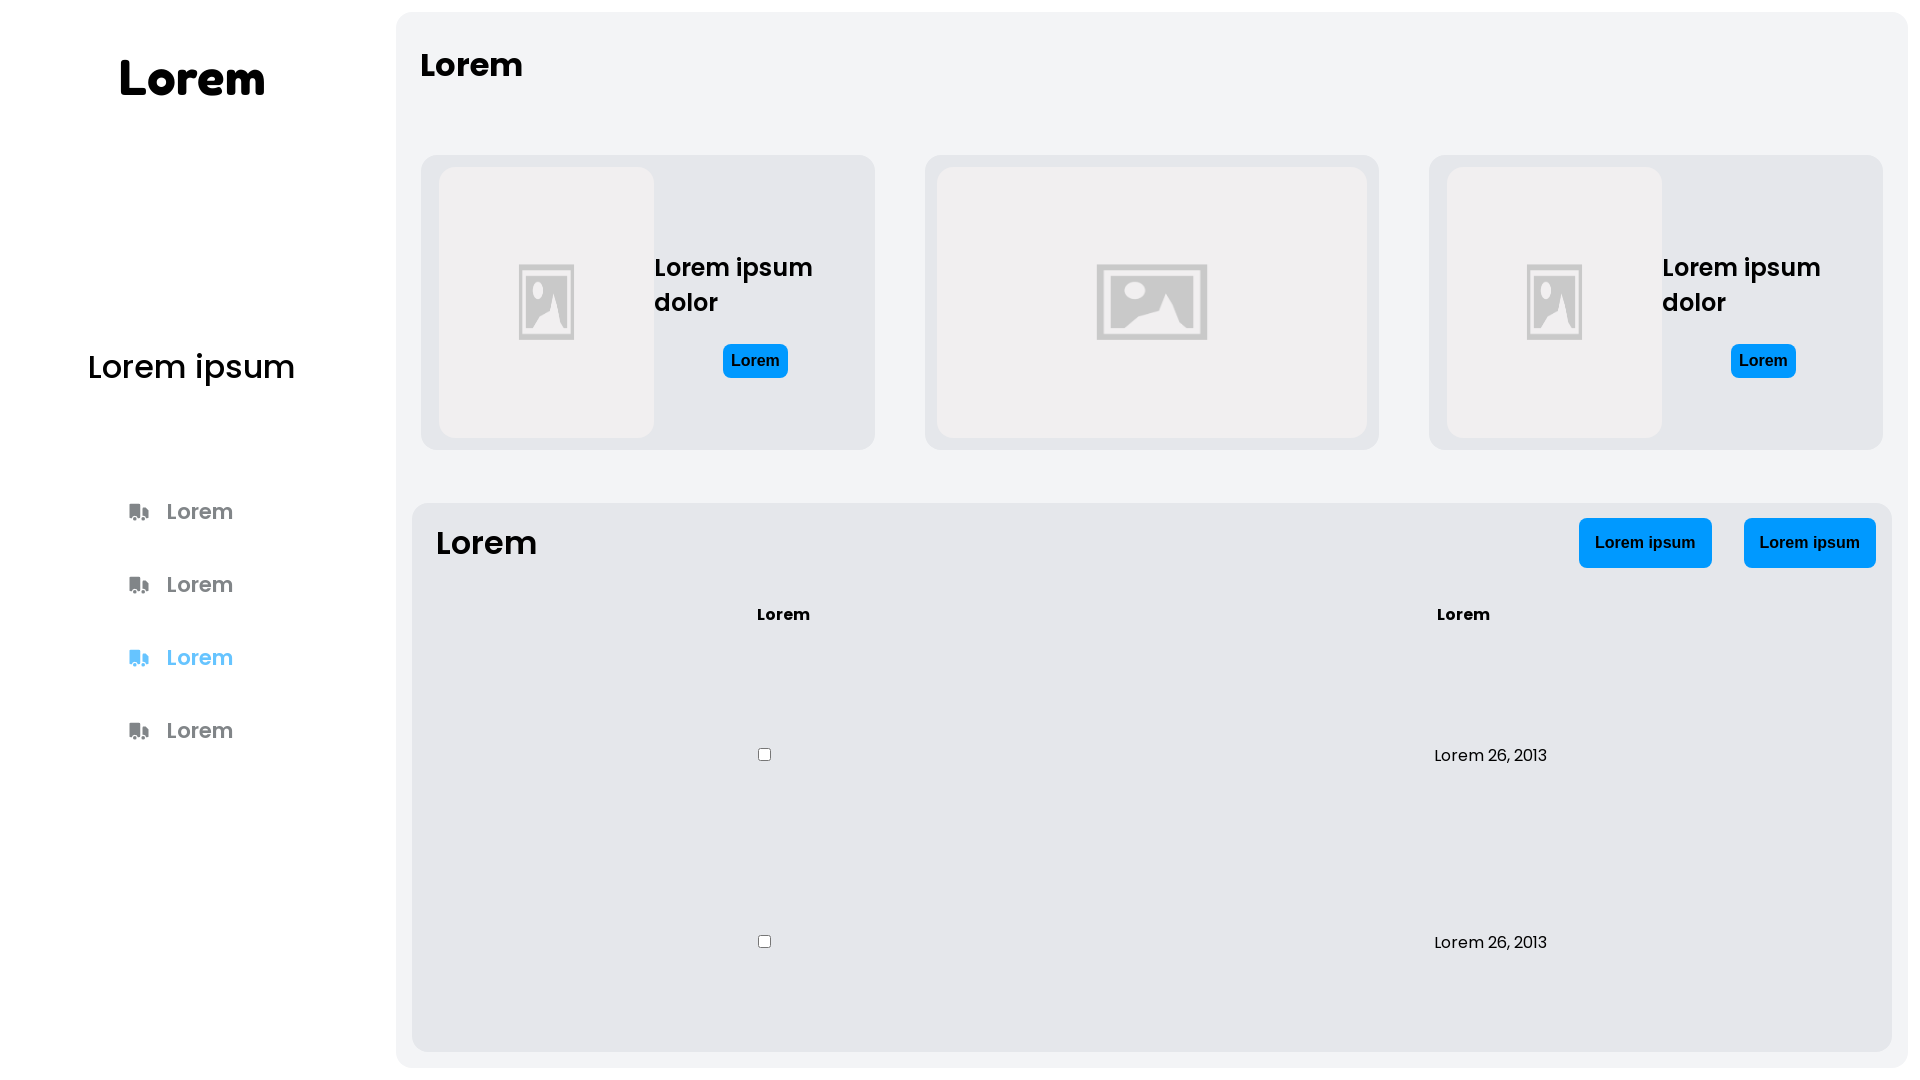

Correct Caption: 

components {
 
sidebar, home
 
}
 
orientation {
 
sidebar-left-home-right
 
}
 
sidebar {
 
logo {
 
logo-txt
 
}
 
user {
 
user-name
 
}
 
nav {
 
field-inactive, field-inactive, field-active, field-inactive
 
}
 
}
 
home {
 
cards {
 
img-txt-btn-card, img-card, img-txt-btn-card
 
}
 
table {
 
btns {
 
btn, btn
 
}
 
table-col {
 
category, category
 
}
 
table-row {
 
entry, entry
 
}
 
}
 
}

Predicted Caption: 

<SOS> components {
 
home, sidebar
 
}
 
orientation {
 
sidebar-right-home-left
 
}
 
home {
 
cards {
 
img-card, img-card, img-card
 
}
 
table {
 
btns {
 
btn, btn
 
}
 
table-col {
 
category, category, category
 
}
 
table-row {
 
entry, entry, entry, entry
 
}
 
}
 
}
 
sidebar {
 
user {
 
user-img-user-name
 
}
 
logo {
 
logo-img
 
}



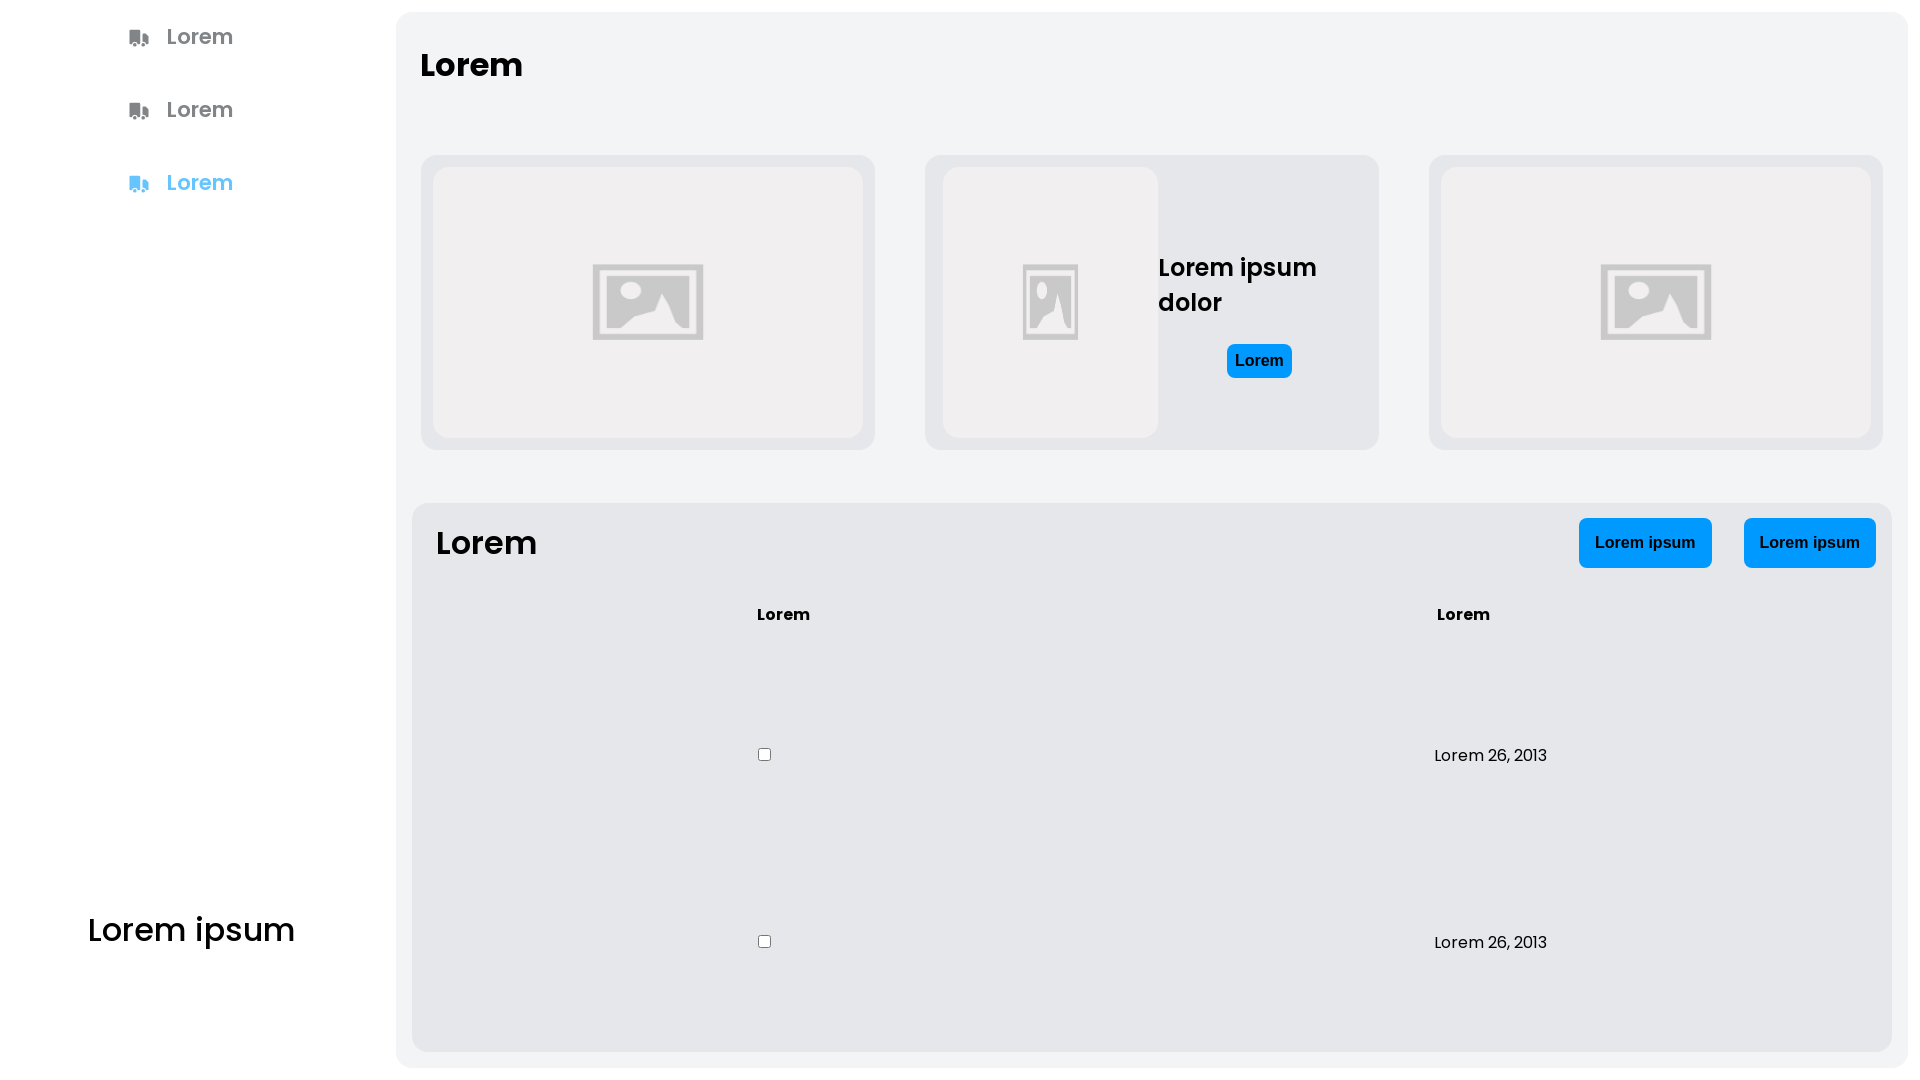

Correct Caption: 

components {
 
sidebar, home
 
}
 
orientation {
 
sidebar-left-home-right
 
}
 
sidebar {
 
nav {
 
field-inactive, field-inactive, field-active
 
}
 
user {
 
user-name
 
}
 
}
 
home {
 
cards {
 
img-card, img-txt-btn-card, img-card
 
}
 
table {
 
btns {
 
btn, btn
 
}
 
table-col {
 
category, category
 
}
 
table-row {
 
entry, entry
 
}
 
}
 
}

Predicted Caption: 

<SOS> components {
 
home, sidebar
 
}
 
orientation {
 
sidebar-right-home-left
 
}
 
home {
 
cards {
 
img-card, img-card, img-card
 
}
 
table {
 
btns {
 
btn, btn
 
}
 
table-col {
 
category, category, category
 
}
 
table-row {
 
entry, entry, entry, entry
 
}
 
}
 
}
 
sidebar {
 
user {
 
user-img-user-name
 
}
 
logo {
 
logo-img
 
}



In [71]:
# Visualize INFERENCE Results

num_viz = 3
count_viz = 0

for testSample in xTest:
  img_viz = Image.open(testSample).convert("RGB")
  img_viz.show()
  print("Correct Caption: \n")
  captionPath = testSample.replace('.png','.gui').replace('/IMAGES/','/TEXT_LABELS/')
  with open(captionPath, "r") as f:
    lines = f.readlines()
  caption = ' \n'.join(lines)
  print(caption)
  transform = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )
  dataset = MyDataset(xTrain, transform)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.eval()
  test_img = transform(Image.open(testSample).convert("RGB")).unsqueeze(0)
  print("Predicted Caption: \n")
  print(" ".join(model.caption_image(test_img.to(device), dataset.vocab)))

  count_viz += 1

  if count_viz == num_viz:
    break

**We observe that even though there are some inaccuracies present with the output, we are still able to generate decent UI code with such a small dataset to work with.**

**EVALUATE PREDICTIONS VIA ROUGE SCORES**

In [72]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [73]:
!pip install rouge-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
# EVALUATE USING ROUGE SCORES
from rouge_score import rouge_scorer

allTestGT = []
allTestPred = []

for item in xTest:
  captionPath = item.replace('.png','.gui').replace('/IMAGES/','/TEXT_LABELS/')
  with open(captionPath, "r") as f:
    lines = f.readlines()
  caption = ' \n'.join(lines)
  allTestGT.append(caption)
  transform = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )
  dataset = MyDataset(xTrain, transform)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.eval()
  test_img = transform(Image.open(testSample).convert("RGB")).unsqueeze(0)
  
  allTestPred.append(" ".join(model.caption_image(test_img.to(device), dataset.vocab)).replace('<SOS> ',''))
print(len(allTestGT))
print(len(allTestPred))

30
30


In [75]:
scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=False)

In [76]:
import numpy as np

r1_prec_list = []
r1_rec_list = []
r1_f1_list = []

r2_prec_list = []
r2_rec_list = []
r2_f1_list = []

rL_prec_list = []
rL_rec_list = []
rL_f1_list = []

for i in range(len(allTestGT)):
  allScores = scorer.score(allTestGT[i], allTestPred[i])

  r1_prec_list.append(allScores['rouge1'].precision)
  r1_rec_list.append(allScores['rouge1'].recall)
  r1_f1_list.append(allScores['rouge1'].fmeasure)

  r2_prec_list.append(allScores['rouge2'].precision)
  r2_rec_list.append(allScores['rouge2'].recall)
  r2_f1_list.append(allScores['rouge2'].fmeasure)

  rL_prec_list.append(allScores['rougeL'].precision)
  rL_rec_list.append(allScores['rougeL'].recall)
  rL_f1_list.append(allScores['rougeL'].fmeasure)

print("Average ROUGE-1 Precision: ",np.mean(r1_prec_list))
print("Average ROUGE-1 Recall: ",np.mean(r1_rec_list))
print("Average ROUGE-1 F1-Score: ",np.mean(r1_f1_list))

print("Average ROUGE-2 Precision: ",np.mean(r2_prec_list))
print("Average ROUGE-2 Recall: ",np.mean(r2_rec_list))
print("Average ROUGE-2 F1-Score: ",np.mean(r2_f1_list))

print("Average ROUGE-L Precision: ",np.mean(rL_prec_list))
print("Average ROUGE-L Recall: ",np.mean(rL_rec_list))
print("Average ROUGE-L F1-Score: ",np.mean(rL_f1_list))

Average ROUGE-1 Precision:  0.8458333333333333
Average ROUGE-1 Recall:  0.7752565817514291
Average ROUGE-1 F1-Score:  0.8068772428112433
Average ROUGE-2 Precision:  0.6324786324786326
Average ROUGE-2 Recall:  0.5821744045332017
Average ROUGE-2 F1-Score:  0.604526594170247
Average ROUGE-L Precision:  0.6383333333333335
Average ROUGE-L Recall:  0.588818033105193
Average ROUGE-L F1-Score:  0.6108999762254487


**From the ROUGE score based analysis we can see that the CNN-LSTM based approach is able to obtain >60% F1-Scores for ROUGE-1,2, and L. This is around 10% worse than the performance on Dataset 1 and about 2% better than the performance on Dataset 2.**